In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from skimage.util import crop
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import convex_hull_image
from skimage.measure import label, regionprops

In [2]:
def plot_image(img):
    
    plt.figure(figsize = (10, 10))
    plt.imshow(img, cmap=plt.cm.gray)

    
def binarize_image(image_array):
    return image_array > threshold_otsu(image_array)

# Prova de conceito

In [3]:
all_images = glob('*.png')

In [4]:
image = imread(all_images[5])

In [5]:
image_gray = rgb2gray(image)

image_bin = binarize_image(image_gray)

image_mask = np.invert(convex_hull_image(image_bin == 0))

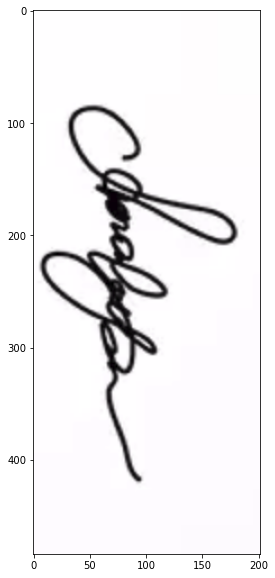

In [6]:
plot_image(image)

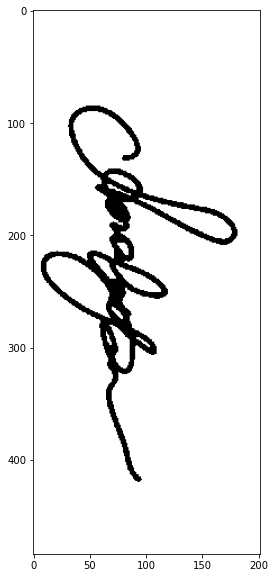

In [7]:
plot_image(image_bin)

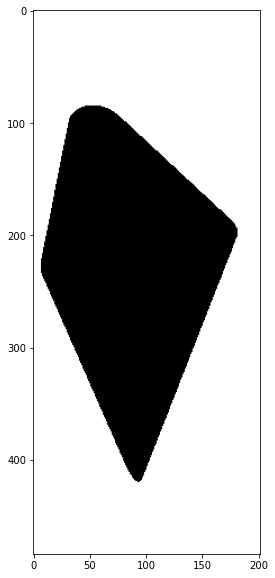

In [8]:
plot_image(image_mask)

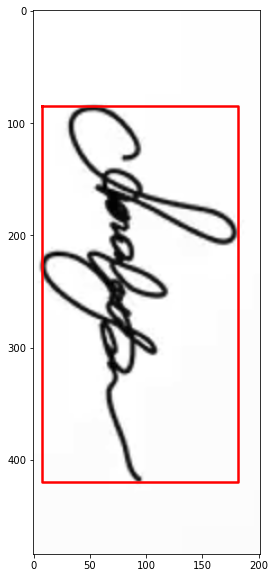

In [9]:
label_img = label(image_mask == 0)
regions = regionprops(label_img)

minr, minc, maxr, maxc = regions[0].bbox

bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)

plot_image(image_gray)
plt.plot(bx, by, '-r', linewidth=2.5)
plt.show()

# Aplicando

In [16]:
def crop_image_roi(image):
    
    # Padding dos limites de borda
    safe_zone_pixel = 5
    
    # Gerando Mask
    image_gray = rgb2gray(image)

    image_bin = binarize_image(image_gray)

    image_mask = np.invert(convex_hull_image(image_bin == 0))

    # Contornando limites
    label_img = label(image_mask == 0)

    region, *_ = regionprops(label_img)
    
    minr, minc, maxr, maxc = region.bbox

    # Cortando o ROI
    return image_gray[minr - safe_zone_pixel:
                      maxr + safe_zone_pixel,
                      minc - safe_zone_pixel: 
                      maxc + safe_zone_pixel]

def rotate_image(image):
    pass

In [14]:
image = imread(all_images[0])
result = crop_image_roi(image)

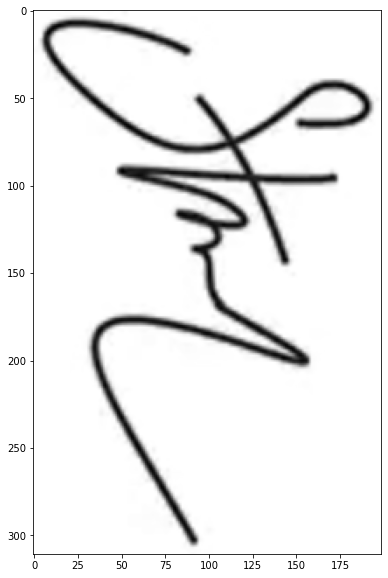

In [15]:
plot_image(result)